# **Import Dataset**

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# **Load Dataset**

In [257]:
# Read the CSV file into a DataFrame
train_features = pd.read_csv('dataset/train_features.csv')
train_labels = pd.read_csv('dataset/train_labels.csv')
test = pd.read_csv('dataset/test_features.csv')
sub = pd.read_csv('dataset/submission_format.csv')

# **Check Dataset**

In [258]:
train_features

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30


In [259]:
train_labels

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4
...,...
3812,5
3813,1
3814,0
3815,0


**Concat Train Dataset**

In [260]:
train=pd.concat([train_features, train_labels], axis=1)
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

## **Umur**

In [262]:
train['umur']=2024-train['tahun_kelahiran']

In [263]:
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2,45
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0,74
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1,58
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4,63
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5,69
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1,77
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0,50
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0,67


## **Convert Pendidikan**

In [264]:
train['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan, '5'],
      dtype=object)

In [265]:
train['pendidikan'] = train['pendidikan'].replace('5', np.nan)
train['pendidikan'] = train['pendidikan'].replace('SMP', 1)
train['pendidikan'] = train['pendidikan'].replace('SMA', 2)
train['pendidikan'] = train['pendidikan'].replace('Sarjana', 3)
train['pendidikan'] = train['pendidikan'].replace('Magister', 4)
train['pendidikan'] = train['pendidikan'].replace('Doktor', 5)
train['pendidikan'] = train['pendidikan'].fillna(0)
train['pendidikan'] = train['pendidikan'].astype(int)

In [266]:
train['pendidikan'].unique()

array([3, 4, 2, 1, 5, 0])

In [267]:
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur
0,1979,3,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2,45
1,1950,3,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0,74
2,1966,3,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1,58
3,1961,4,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4,63
4,1970,3,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5,69
3813,1947,5,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1,77
3814,1974,4,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0,50
3815,1957,2,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0,67


## **Convert Status Pernikahan**

In [268]:
train['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati', '5'], dtype=object)

In [269]:
train['status_pernikahan'] = train['status_pernikahan'].replace('5', np.nan)

In [270]:
encoded_df = pd.get_dummies(train['status_pernikahan'])

In [271]:
encoded_df = encoded_df.astype(int)
encoded_df

,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3812,0,0,1,0,0
3813,0,0,0,1,0
3814,0,0,1,0,0
3815,0,0,0,1,0


In [272]:
train=pd.concat([train, encoded_df], axis=1)
train

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,...,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri
0,1979,3,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,...,5.0,0.0,2014-05-05,2,45,0,0,0,1,0
1,1950,3,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,...,4.0,0.0,2013-03-17,0,74,0,0,0,1,0
2,1966,3,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,...,7.0,0.0,NaN,1,58,0,0,1,0,0
3,1961,4,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,...,8.0,0.0,NaN,4,63,0,0,0,1,0
4,1970,3,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,...,5.0,0.0,NaN,4,54,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,...,0.0,0.0,NaN,5,69,0,0,1,0,0
3813,1947,5,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,...,3.0,0.0,2014-06-09,1,77,0,0,0,1,0
3814,1974,4,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,...,7.0,0.0,2013-11-07,0,50,0,0,1,0,0
3815,1957,2,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,...,4.0,0.0,2013-06-30,0,67,0,0,0,1,0


In [273]:
train=train.drop(['status_pernikahan'],axis=1)
train

,tahun_kelahiran,pendidikan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,...,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,umur,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri
0,1979,3,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,...,5.0,0.0,2014-05-05,2,45,0,0,0,1,0
1,1950,3,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,...,4.0,0.0,2013-03-17,0,74,0,0,0,1,0
2,1966,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,...,7.0,0.0,NaN,1,58,0,0,1,0,0
3,1961,4,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,...,8.0,0.0,NaN,4,63,0,0,0,1,0
4,1970,3,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,...,5.0,0.0,NaN,4,54,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,4,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,...,0.0,0.0,NaN,5,69,0,0,1,0,0
3813,1947,5,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,...,3.0,0.0,2014-06-09,1,77,0,0,0,1,0
3814,1974,4,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,...,7.0,0.0,2013-11-07,0,50,0,0,1,0,0
3815,1957,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,...,4.0,0.0,2013-06-30,0,67,0,0,0,1,0


In [274]:
train=train[['tahun_kelahiran','umur', 'pendidikan','Cerai','Cerai Mati','Menikah','Rencana Menikah','Sendiri','pendapatan','jumlah_anak_balita','jumlah_anak_remaja','terakhir_belanja','belanja_buah','belanja_daging','belanja_ikan','belanja_kue','pembelian_diskon','pembelian_web','pembelian_toko','keluhan','tanggal_menjadi_anggota','jumlah_promosi']]
train

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak_balita,...,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,45,3,0,0,0,1,0,NaN,0.0,...,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,74,3,0,0,0,1,0,84063000.0,NaN,...,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,58,3,0,0,1,0,0,127532564.0,0.0,...,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,63,4,0,0,0,1,0,165579620.0,0.0,...,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,54,3,0,0,0,1,0,117703159.0,1.0,...,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,69,4,0,0,1,0,0,78199470.0,0.0,...,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,77,5,0,0,0,1,0,109306000.0,0.0,...,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,50,4,0,0,1,0,0,104621000.0,0.0,...,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,67,2,0,0,0,1,0,110850000.0,1.0,...,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


## **Analisis Pendapatan**

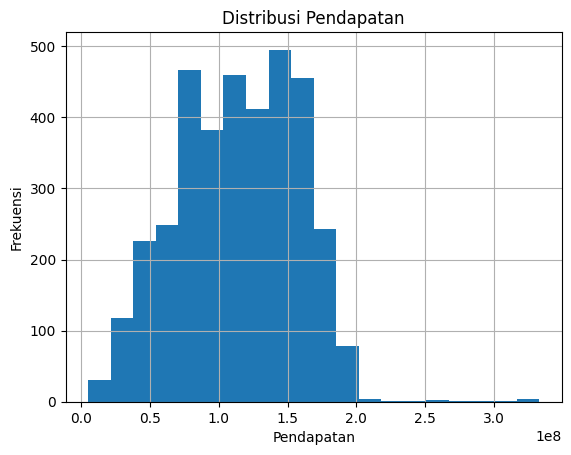

In [275]:
train['pendapatan'].hist(bins=20)
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Pendapatan')
plt.show()

In [276]:
median_value = train['pendapatan'].median()  # Calculate the median value

# Fill missing values with the median
train['pendapatan'] = train['pendapatan'].fillna(median_value)
train['pendapatan'] = train['pendapatan'].astype(int)

In [277]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3627 non-null   float64
 10  jumlah_anak_remaja       3613 non-null   float64
 11  terakhir_belanja         3645 non-null   float64
 12  belanja_buah             3636 non-null   float64
 13  belanja_daging           3639 non-null   float64
 14  belanja_ikan            

## **Jumlah Anak Balita**

In [278]:
train['jumlah_anak_balita'].unique()

array([ 0., nan,  1.,  2.])

In [279]:
train[train['jumlah_anak_balita'].isna()]

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak_balita,...,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
1,1950,74,3,0,0,0,1,0,84063000,NaN,...,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
13,1979,45,1,0,0,1,0,0,14967000,NaN,...,34391.0,30345.0,32368.0,0.0,0.0,5.0,2.0,0.0,2012-11-14,0
17,1973,51,3,0,0,0,1,0,119766595,NaN,...,20230.0,181594.0,10650.0,51288.0,0.0,7.0,8.0,0.0,NaN,3
43,1954,70,4,0,0,0,1,0,105339251,NaN,...,4046.0,154472.0,15851.0,442.0,7.0,9.0,4.0,0.0,NaN,4
52,1956,68,4,0,0,0,1,0,190785436,NaN,...,77286.0,1082787.0,112601.0,19302.0,0.0,9.0,6.0,0.0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,1990,34,2,0,0,1,0,0,125535217,NaN,...,35834.0,NaN,NaN,103129.0,0.0,0.0,4.0,0.0,NaN,0
3783,1966,58,4,0,0,0,1,0,65730000,NaN,...,0.0,52598.0,NaN,0.0,2.0,4.0,NaN,0.0,2012-09-07,0
3792,1956,68,5,0,0,0,1,0,136934000,NaN,...,76874.0,NaN,24276.0,0.0,5.0,13.0,3.0,0.0,2013-03-07,6
3795,1987,37,2,0,0,1,0,0,165167035,NaN,...,NaN,674183.0,54447.0,53628.0,2.0,3.0,8.0,0.0,NaN,5


In [280]:
# ## ganti semua yang cerai, cerai mati, rencana menikah, sm single jadi 0 anak
train.loc[(train['Cerai'] == 1) | (train['Cerai Mati'] == 1) | (train['Rencana Menikah'] == 1) | (train['Sendiri'] == 1), 'jumlah_anak_balita'] = train['jumlah_anak_balita'].fillna(0)
train

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak_balita,...,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,1979,45,3,0,0,0,1,0,115621394,0.0,...,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2
1,1950,74,3,0,0,0,1,0,84063000,0.0,...,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
2,1966,58,3,0,0,1,0,0,127532564,0.0,...,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1
3,1961,63,4,0,0,0,1,0,165579620,0.0,...,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4
4,1970,54,3,0,0,0,1,0,117703159,1.0,...,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,69,4,0,0,1,0,0,78199470,0.0,...,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5
3813,1947,77,5,0,0,0,1,0,109306000,0.0,...,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,1
3814,1974,50,4,0,0,1,0,0,104621000,0.0,...,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0
3815,1957,67,2,0,0,0,1,0,110850000,1.0,...,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,0


In [281]:
# ## pukul rata sisanya jadi 1 anak
train['jumlah_anak_balita'] = train['jumlah_anak_balita'].fillna(1)
train['jumlah_anak_balita'] = train['jumlah_anak_balita'].astype(int)

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3613 non-null   float64
 11  terakhir_belanja         3645 non-null   float64
 12  belanja_buah             3636 non-null   float64
 13  belanja_daging           3639 non-null   float64
 14  belanja_ikan            

## **Jumlah Anak Remaja**

In [283]:
train['jumlah_anak_remaja'].unique()

array([ 1., nan,  0.,  2.])

In [284]:
train[train['jumlah_anak_remaja'].isna()]

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak_balita,...,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
1,1950,74,3,0,0,0,1,0,84063000,0,...,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0
6,1963,61,4,0,0,0,0,1,75313000,2,...,0.0,14161.0,8092.0,2023.0,1.0,4.0,5.0,0.0,2013-05-03,0
9,1975,49,3,0,0,1,0,0,37567504,1,...,19061.0,28067.0,22223.0,14146.0,3.0,2.0,1.0,0.0,NaN,2
12,1957,67,3,0,0,0,0,1,152418000,0,...,149702.0,337841.0,93058.0,72828.0,3.0,10.0,2.0,0.0,2013-11-21,4
21,1965,59,3,0,0,1,0,0,138197975,0,...,40357.0,214915.0,40670.0,43342.0,4.0,6.0,8.0,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,1975,49,4,0,0,0,1,0,72537110,1,...,26465.0,43570.0,6555.0,755.0,2.0,2.0,4.0,0.0,NaN,6
3745,1975,49,2,0,0,0,0,1,51559463,1,...,12493.0,25109.0,33815.0,22007.0,1.0,2.0,NaN,0.0,NaN,3
3771,1948,76,4,0,0,0,1,0,198018607,0,...,70474.0,1440714.0,155617.0,88035.0,0.0,6.0,7.0,0.0,NaN,5
3773,1975,49,1,0,0,0,1,0,23664655,1,...,NaN,NaN,11259.0,24113.0,1.0,1.0,4.0,0.0,NaN,6


In [285]:
train.loc[(train['Rencana Menikah'] == 1) | (train['Sendiri'] == 1), 'jumlah_anak_remaja'] = train['jumlah_anak_remaja'].fillna(0)


In [286]:
train['jumlah_anak_remaja'] = train['jumlah_anak_remaja'].fillna(0)

In [287]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3817 non-null   float64
 11  terakhir_belanja         3645 non-null   float64
 12  belanja_buah             3636 non-null   float64
 13  belanja_daging           3639 non-null   float64
 14  belanja_ikan            

### **Jumlah Anak**

In [288]:
train['jumlah_anak']=train['jumlah_anak_balita']+train['jumlah_anak_remaja']

## **Terakhir Belanja**

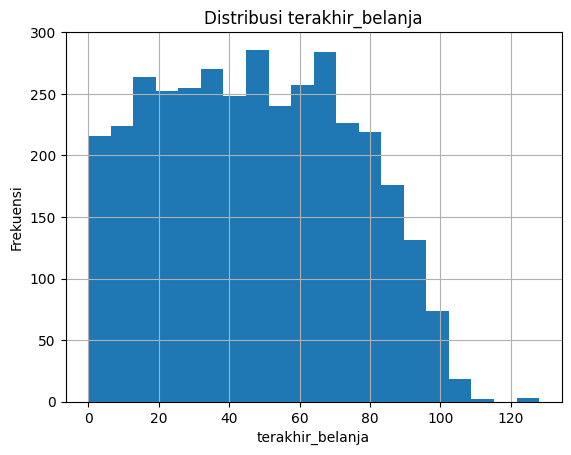

In [289]:
train['terakhir_belanja'].hist(bins=20)
plt.xlabel('terakhir_belanja')
plt.ylabel('Frekuensi')
plt.title('Distribusi terakhir_belanja')
plt.show()

In [290]:
median_value = train['terakhir_belanja'].median()
train['terakhir_belanja'] = train['terakhir_belanja'].fillna(median_value)

In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3817 non-null   float64
 11  terakhir_belanja         3817 non-null   float64
 12  belanja_buah             3636 non-null   float64
 13  belanja_daging           3639 non-null   float64
 14  belanja_ikan            

## **Belanja**

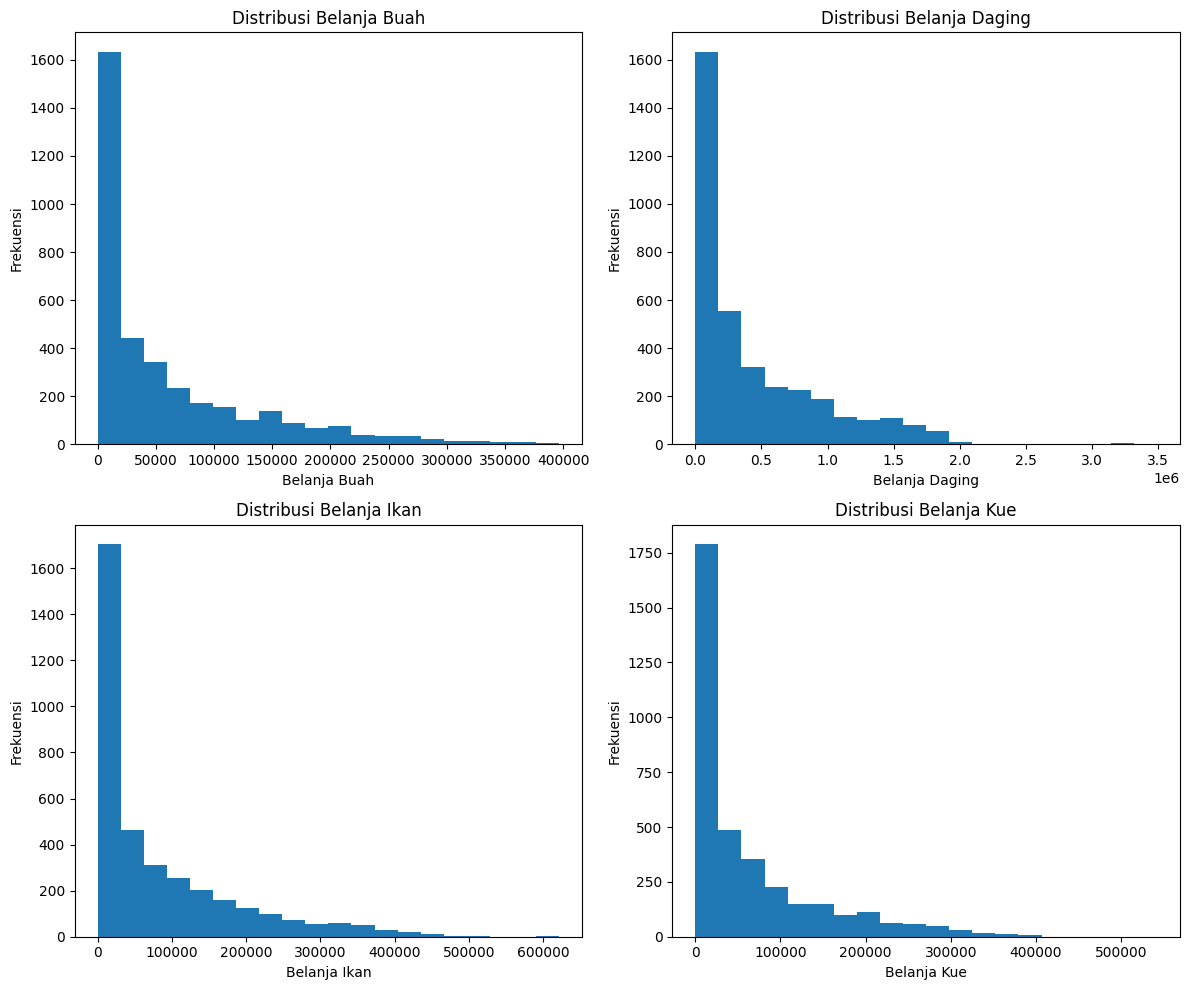

In [292]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot belanja_buah histogram
axs[0, 0].hist(train['belanja_buah'], bins=20)
axs[0, 0].set_xlabel('Belanja Buah')
axs[0, 0].set_ylabel('Frekuensi')
axs[0, 0].set_title('Distribusi Belanja Buah')

# Plot belanja_daging histogram
axs[0, 1].hist(train['belanja_daging'], bins=20)
axs[0, 1].set_xlabel('Belanja Daging')
axs[0, 1].set_ylabel('Frekuensi')
axs[0, 1].set_title('Distribusi Belanja Daging')

# Plot belanja_ikan histogram
axs[1, 0].hist(train['belanja_ikan'], bins=20)
axs[1, 0].set_xlabel('Belanja Ikan')
axs[1, 0].set_ylabel('Frekuensi')
axs[1, 0].set_title('Distribusi Belanja Ikan')

# Plot belanja_kue histogram
axs[1, 1].hist(train['belanja_kue'], bins=20)
axs[1, 1].set_xlabel('Belanja Kue')
axs[1, 1].set_ylabel('Frekuensi')
axs[1, 1].set_title('Distribusi Belanja Kue')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Fill Belanja with Median | Mean / range pendapatan

In [293]:
belanja = train[['pendapatan', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']]
belanja

,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue
0,115621394,50575.0,260967.0,50575.0,20230.0
1,84063000,6069.0,44506.0,80920.0,20230.0
2,127532564,117611.0,265460.0,96341.0,145573.0
3,165579620,206346.0,1613901.0,27725.0,125868.0
4,117703159,90563.0,311757.0,40358.0,33875.0
...,...,...,...,...,...
3812,78199470,6069.0,25977.0,3856.0,5784.0
3813,109306000,0.0,50575.0,NaN,0.0
3814,104621000,2023.0,62713.0,8092.0,0.0
3815,110850000,18207.0,70805.0,24276.0,NaN


In [294]:
belanja['total_belanja'] = belanja['belanja_buah'] + belanja['belanja_daging'] + belanja['belanja_ikan'] + belanja['belanja_kue']
belanja

C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\1830757113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belanja['total_belanja'] = belanja['belanja_buah'] + belanja['belanja_daging'] + belanja['belanja_ikan'] + belanja['belanja_kue']


,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja
0,115621394,50575.0,260967.0,50575.0,20230.0,382347.0
1,84063000,6069.0,44506.0,80920.0,20230.0,151725.0
2,127532564,117611.0,265460.0,96341.0,145573.0,624985.0
3,165579620,206346.0,1613901.0,27725.0,125868.0,1973840.0
4,117703159,90563.0,311757.0,40358.0,33875.0,476553.0
...,...,...,...,...,...,...
3812,78199470,6069.0,25977.0,3856.0,5784.0,41686.0
3813,109306000,0.0,50575.0,NaN,0.0,NaN
3814,104621000,2023.0,62713.0,8092.0,0.0,72828.0
3815,110850000,18207.0,70805.0,24276.0,NaN,NaN


In [295]:
belanja[(belanja['belanja_buah'] > belanja['pendapatan']) | (belanja['belanja_daging'] > belanja['pendapatan']) | (belanja['belanja_ikan'] > belanja['pendapatan']) | (belanja['belanja_kue'] > belanja['pendapatan'])]

,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja


In [296]:
belanja['pendapatan'].min()

5073000

In [297]:
belanja['pendapatan'].max()

332884000

In [298]:
belanja['pendapatan'].isnull().sum()

0

In [299]:
belanja['belanja_daging'].isnull().sum()

178

In [300]:
import math

min_pendapatan = 5073000
max_pendapatan = 332884000
total_samples = len(belanja)  # Harap sesuaikan dengan nama DataFrame yang Anda gunakan

num_bins_sturges = 1 + math.log2(total_samples)
print("Jumlah bin (Sturges):", round(num_bins_sturges))


Jumlah bin (Sturges): 13


In [301]:
num_bins_square_root = math.sqrt(total_samples)
print("Jumlah bin (Square Root):", round(num_bins_square_root))

Jumlah bin (Square Root): 62


In [302]:
# Calculate the bin width
bin_width = (max_pendapatan - min_pendapatan) / num_bins_sturges

# Generate bin edges
bin_edges = np.arange(min_pendapatan, max_pendapatan + bin_width, bin_width)

# Define the bin labels
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_edges[:-1], bin_edges[1:])]

# Apply binning to the 'pendapatan' column
belanja['pendapatan_range'] = pd.cut(belanja['pendapatan'], bins=bin_edges, labels=bin_labels, include_lowest=True)
belanja

C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\1904537580.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belanja['pendapatan_range'] = pd.cut(belanja['pendapatan'], bins=bin_edges, labels=bin_labels, include_lowest=True)


,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja,pendapatan_range
0,115621394,50575.0,260967.0,50575.0,20230.0,382347.0,106733821.96716857-132149026.45896071
1,84063000,6069.0,44506.0,80920.0,20230.0,151725.0,81318616.47537643-106733820.96716857
2,127532564,117611.0,265460.0,96341.0,145573.0,624985.0,106733821.96716857-132149026.45896071
3,165579620,206346.0,1613901.0,27725.0,125868.0,1973840.0,157564232.95075285-182979437.442545
4,117703159,90563.0,311757.0,40358.0,33875.0,476553.0,106733821.96716857-132149026.45896071
...,...,...,...,...,...,...,...
3812,78199470,6069.0,25977.0,3856.0,5784.0,41686.0,55903410.983584285-81318615.47537643
3813,109306000,0.0,50575.0,NaN,0.0,NaN,106733821.96716857-132149026.45896071
3814,104621000,2023.0,62713.0,8092.0,0.0,72828.0,81318616.47537643-106733820.96716857
3815,110850000,18207.0,70805.0,24276.0,NaN,NaN,106733821.96716857-132149026.45896071


In [303]:
belanja.iloc[3813]

pendapatan                                      109306000
belanja_buah                                          0.0
belanja_daging                                    50575.0
belanja_ikan                                          NaN
belanja_kue                                           0.0
total_belanja                                         NaN
pendapatan_range    106733821.96716857-132149026.45896071
Name: 3813, dtype: object

In [304]:
# Compute the median for 'belanja_buah' and 'belanja_daging' based on 'pendapatan_range' for df_checking_median
median_belanja_buah= belanja.groupby('pendapatan_range')['belanja_buah'].transform('median')
median_belanja_daging = belanja.groupby('pendapatan_range')['belanja_daging'].transform('median')
median_belanja_ikan = belanja.groupby('pendapatan_range')['belanja_ikan'].transform('median')
median_belanja_kue = belanja.groupby('pendapatan_range')['belanja_kue'].transform('median')

# Fill NaN values with computed median for df_checking_median
belanja['belanja_buah'] = belanja['belanja_buah'].fillna(median_belanja_buah)
belanja['belanja_daging'] = belanja['belanja_daging'].fillna(median_belanja_daging)
belanja['belanja_ikan'] = belanja['belanja_ikan'].fillna(median_belanja_ikan)
belanja['belanja_kue'] = belanja['belanja_kue'].fillna(median_belanja_kue)

C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\229880615.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_belanja_buah= belanja.groupby('pendapatan_range')['belanja_buah'].transform('median')
C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\229880615.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_belanja_daging = belanja.groupby('pendapatan_range')['belanja_daging'].transform('median')
C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\229880615.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

In [305]:
belanja.iloc[3813]

pendapatan                                      109306000
belanja_buah                                          0.0
belanja_daging                                    50575.0
belanja_ikan                                      27739.0
belanja_kue                                           0.0
total_belanja                                         NaN
pendapatan_range    106733821.96716857-132149026.45896071
Name: 3813, dtype: object

In [306]:
belanja.groupby('pendapatan_range')['belanja_ikan'].median()

C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\2235850718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  belanja.groupby('pendapatan_range')['belanja_ikan'].median()


pendapatan_range
5073000.0-30488204.491792142              11599.0
30488205.491792142-55903409.983584285     14248.0
55903410.983584285-81318615.47537643      10115.0
81318616.47537643-106733820.96716857      14554.0
106733821.96716857-132149026.45896071     27739.0
132149027.45896071-157564231.95075285    105943.0
157564232.95075285-182979437.442545      136659.0
182979438.442545-208394642.93433714      162508.0
208394643.93433714-233809848.42612928    174480.0
233809849.42612928-259225053.91792142     90537.0
259225054.91792142-284640259.40971357    155315.0
284640260.40971357-310055464.9015057      37883.0
310055465.9015057-335470670.39329785          0.0
Name: belanja_ikan, dtype: float64

In [327]:
# ## buat sesuai median juga
def med(kolom):
  median_value = train[kolom].median()
  train[kolom] = train[kolom].fillna(median_value)
# belanja('belanja_buah')
# belanja('belanja_daging')
# belanja('belanja_ikan')
# belanja('belanja_kue')

In [307]:
belanja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pendapatan        3817 non-null   int32   
 1   belanja_buah      3817 non-null   float64 
 2   belanja_daging    3817 non-null   float64 
 3   belanja_ikan      3817 non-null   float64 
 4   belanja_kue       3816 non-null   float64 
 5   total_belanja     3102 non-null   float64 
 6   pendapatan_range  3817 non-null   category
dtypes: category(1), float64(5), int32(1)
memory usage: 168.5 KB


In [309]:
belanja.groupby('pendapatan_range')['belanja_kue'].median()

C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\1731732900.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  belanja.groupby('pendapatan_range')['belanja_kue'].median()


pendapatan_range
5073000.0-30488204.491792142              12114.0
30488205.491792142-55903409.983584285     10115.0
55903410.983584285-81318615.47537643       8092.0
81318616.47537643-106733820.96716857      14152.0
106733821.96716857-132149026.45896071     21916.5
132149027.45896071-157564231.95075285     70848.0
157564232.95075285-182979437.442545      125703.0
182979438.442545-208394642.93433714      153359.0
208394643.93433714-233809848.42612928    240330.0
233809849.42612928-259225053.91792142     95062.0
259225054.91792142-284640259.40971357     64629.0
284640260.40971357-310055464.9015057          NaN
310055465.9015057-335470670.39329785       6069.0
Name: belanja_kue, dtype: float64

In [310]:
belanja[belanja['pendapatan_range'] == '284640260.40971357-310055464.9015057']

,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja,pendapatan_range
2084,286760347,17582.0,2795597.0,37883.0,NaN,NaN,284640260.40971357-310055464.9015057


In [308]:
belanja[belanja['belanja_kue'].isnull()]

,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja,pendapatan_range
2084,286760347,17582.0,2795597.0,37883.0,NaN,NaN,284640260.40971357-310055464.9015057


In [312]:
belanja.at[2084, 'belanja_kue'] = 64629
belanja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pendapatan        3817 non-null   int32   
 1   belanja_buah      3817 non-null   float64 
 2   belanja_daging    3817 non-null   float64 
 3   belanja_ikan      3817 non-null   float64 
 4   belanja_kue       3817 non-null   float64 
 5   total_belanja     3102 non-null   float64 
 6   pendapatan_range  3817 non-null   category
dtypes: category(1), float64(5), int32(1)
memory usage: 168.5 KB


In [313]:
belanja['total_belanja'] = belanja['belanja_buah'] + belanja['belanja_daging'] + belanja['belanja_ikan'] + belanja['belanja_kue']
belanja

C:\Users\XYLA\AppData\Local\Temp\ipykernel_17628\1830757113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belanja['total_belanja'] = belanja['belanja_buah'] + belanja['belanja_daging'] + belanja['belanja_ikan'] + belanja['belanja_kue']


,pendapatan,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja,pendapatan_range
0,115621394,50575.0,260967.0,50575.0,20230.0,382347.0,106733821.96716857-132149026.45896071
1,84063000,6069.0,44506.0,80920.0,20230.0,151725.0,81318616.47537643-106733820.96716857
2,127532564,117611.0,265460.0,96341.0,145573.0,624985.0,106733821.96716857-132149026.45896071
3,165579620,206346.0,1613901.0,27725.0,125868.0,1973840.0,157564232.95075285-182979437.442545
4,117703159,90563.0,311757.0,40358.0,33875.0,476553.0,106733821.96716857-132149026.45896071
...,...,...,...,...,...,...,...
3812,78199470,6069.0,25977.0,3856.0,5784.0,41686.0,55903410.983584285-81318615.47537643
3813,109306000,0.0,50575.0,27739.0,0.0,78314.0,106733821.96716857-132149026.45896071
3814,104621000,2023.0,62713.0,8092.0,0.0,72828.0,81318616.47537643-106733820.96716857
3815,110850000,18207.0,70805.0,24276.0,21916.5,135204.5,106733821.96716857-132149026.45896071


In [314]:
belanja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pendapatan        3817 non-null   int32   
 1   belanja_buah      3817 non-null   float64 
 2   belanja_daging    3817 non-null   float64 
 3   belanja_ikan      3817 non-null   float64 
 4   belanja_kue       3817 non-null   float64 
 5   total_belanja     3817 non-null   float64 
 6   pendapatan_range  3817 non-null   category
dtypes: category(1), float64(5), int32(1)
memory usage: 168.5 KB


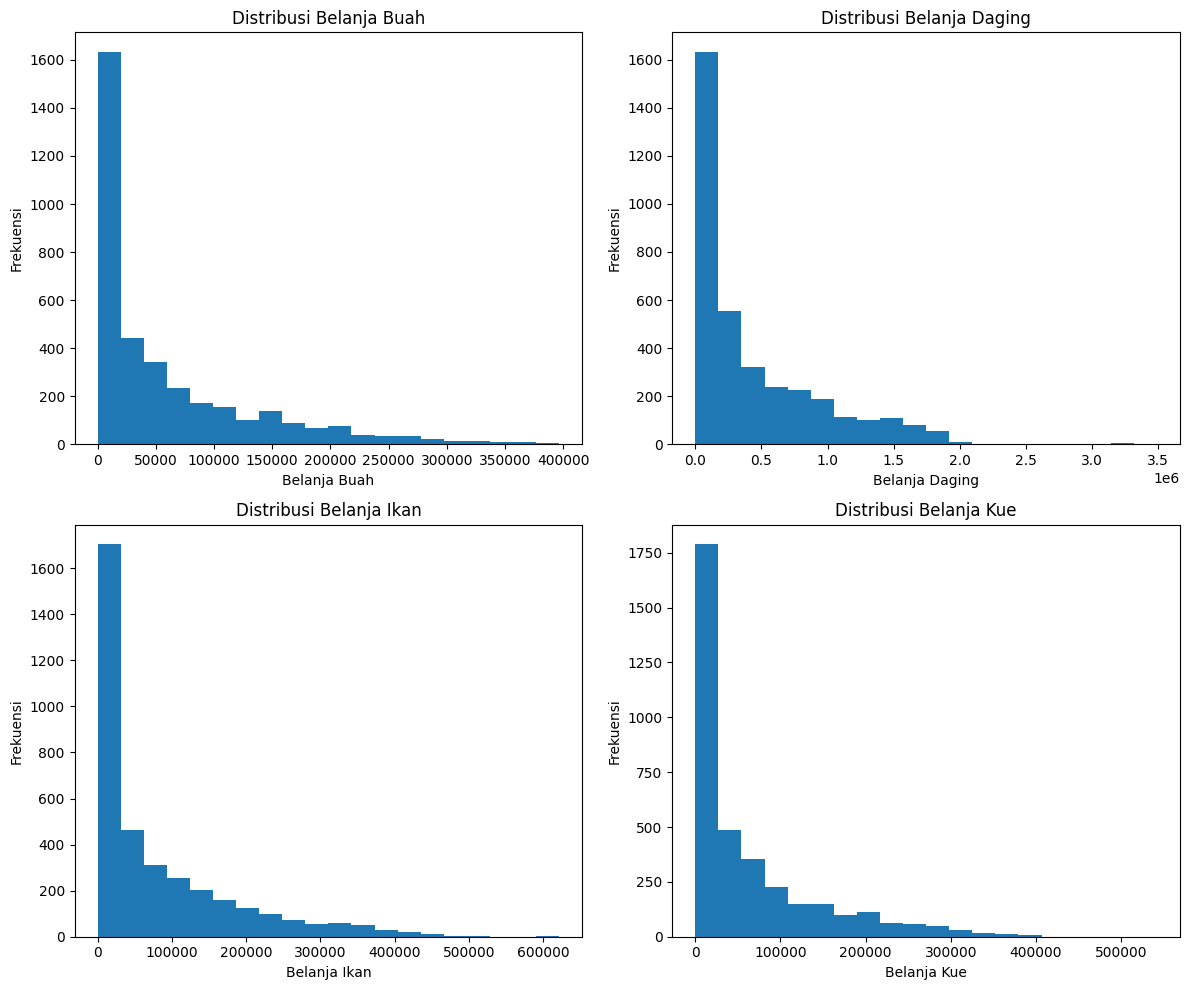

In [315]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot belanja_buah histogram
axs[0, 0].hist(train['belanja_buah'], bins=20)
axs[0, 0].set_xlabel('Belanja Buah')
axs[0, 0].set_ylabel('Frekuensi')
axs[0, 0].set_title('Distribusi Belanja Buah')

# Plot belanja_daging histogram
axs[0, 1].hist(train['belanja_daging'], bins=20)
axs[0, 1].set_xlabel('Belanja Daging')
axs[0, 1].set_ylabel('Frekuensi')
axs[0, 1].set_title('Distribusi Belanja Daging')

# Plot belanja_ikan histogram
axs[1, 0].hist(train['belanja_ikan'], bins=20)
axs[1, 0].set_xlabel('Belanja Ikan')
axs[1, 0].set_ylabel('Frekuensi')
axs[1, 0].set_title('Distribusi Belanja Ikan')

# Plot belanja_kue histogram
axs[1, 1].hist(train['belanja_kue'], bins=20)
axs[1, 1].set_xlabel('Belanja Kue')
axs[1, 1].set_ylabel('Frekuensi')
axs[1, 1].set_title('Distribusi Belanja Kue')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [316]:
train.update(belanja[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']])

In [317]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3817 non-null   float64
 11  terakhir_belanja         3817 non-null   float64
 12  belanja_buah             3817 non-null   float64
 13  belanja_daging           3817 non-null   float64
 14  belanja_ikan            

In [42]:
train['total_belanja']=train['belanja_buah']+train['belanja_daging']+train['belanja_ikan']+train['belanja_kue']

## **Pembelian**

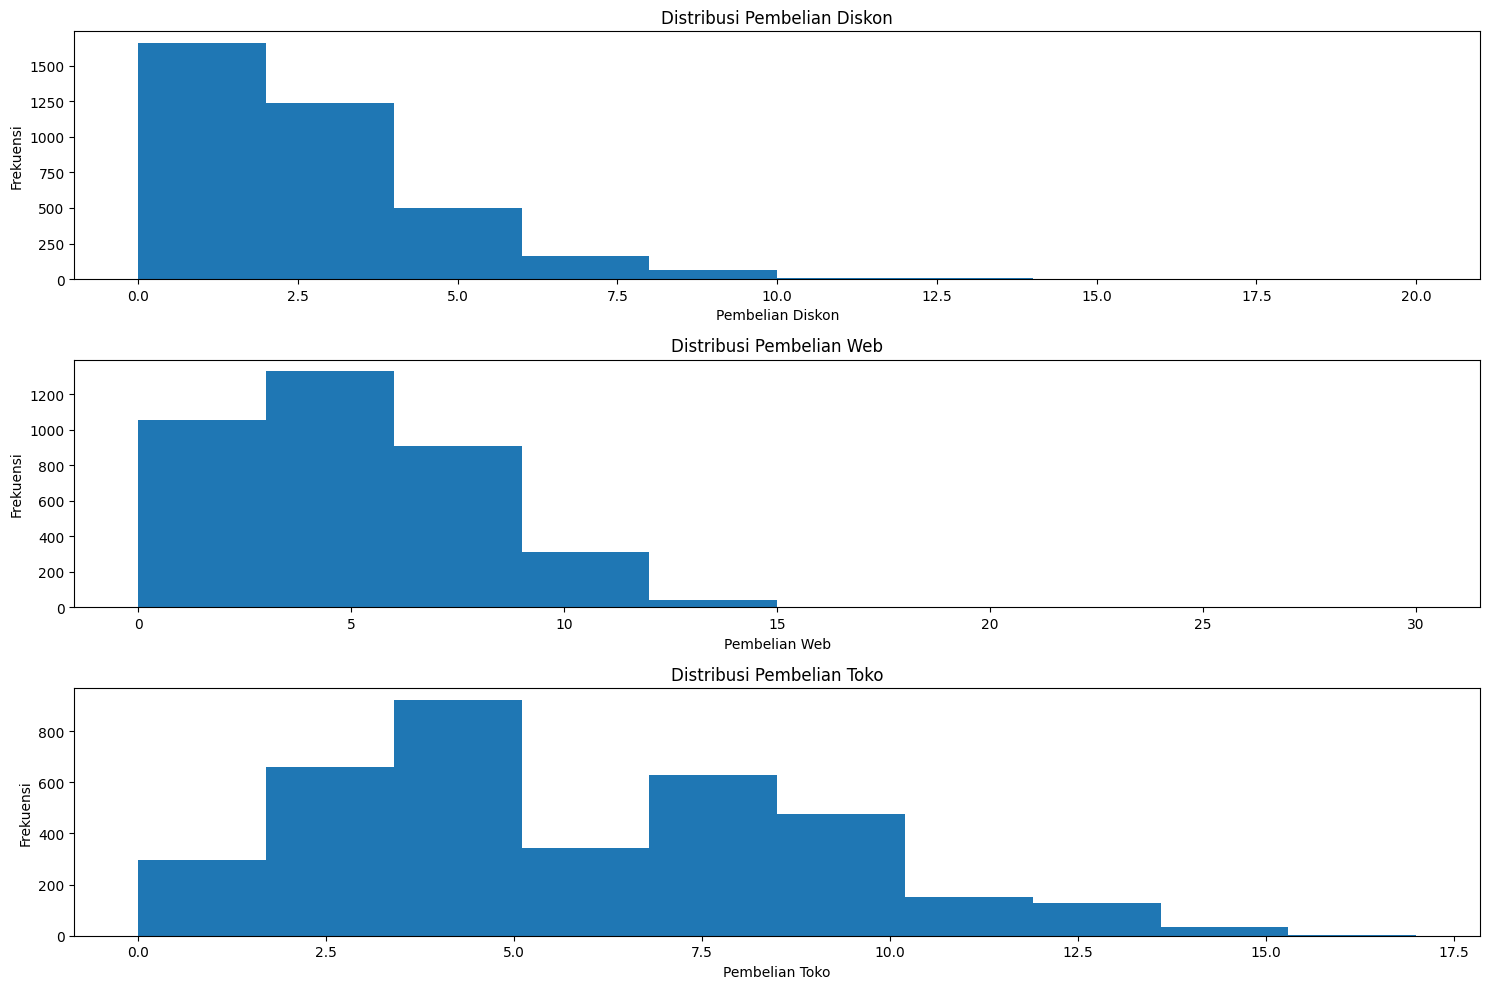

In [318]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

# Plot pembelian_diskon histogram
axs[0].hist(train['pembelian_diskon'], bins=10)
axs[0].set_xlabel('Pembelian Diskon')
axs[0].set_ylabel('Frekuensi')
axs[0].set_title('Distribusi Pembelian Diskon')

# Plot pembelian_web histogram
axs[1].hist(train['pembelian_web'], bins=10)
axs[1].set_xlabel('Pembelian Web')
axs[1].set_ylabel('Frekuensi')
axs[1].set_title('Distribusi Pembelian Web')

# Plot pembelian_toko histogram
axs[2].hist(train['pembelian_toko'], bins=10)
axs[2].set_xlabel('Pembelian Toko')
axs[2].set_ylabel('Frekuensi')
axs[2].set_title('Distribusi Pembelian Toko')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [320]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3817 non-null   float64
 11  terakhir_belanja         3817 non-null   float64
 12  belanja_buah             3817 non-null   float64
 13  belanja_daging           3817 non-null   float64
 14  belanja_ikan            

In [321]:
train

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak_balita,...,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,jumlah_anak
0,1979,45,3,0,0,0,1,0,115621394,0,...,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,2,1.0
1,1950,74,3,0,0,0,1,0,84063000,0,...,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,0,0.0
2,1966,58,3,0,0,1,0,0,127532564,0,...,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1,0.0
3,1961,63,4,0,0,0,1,0,165579620,0,...,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4,0.0
4,1970,54,3,0,0,0,1,0,117703159,1,...,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,69,4,0,0,1,0,0,78199470,0,...,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,5,0.0
3813,1947,77,5,0,0,0,1,0,109306000,0,...,50575.0,27739.0,0.0,3.0,6.0,3.0,0.0,2014-06-09,1,1.0
3814,1974,50,4,0,0,1,0,0,104621000,0,...,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,0,2.0
3815,1957,67,2,0,0,0,1,0,110850000,1,...,70805.0,24276.0,21916.5,4.0,5.0,4.0,0.0,2013-06-30,0,2.0


In [323]:
train_woDate = train.drop('tanggal_menjadi_anggota', axis=1)

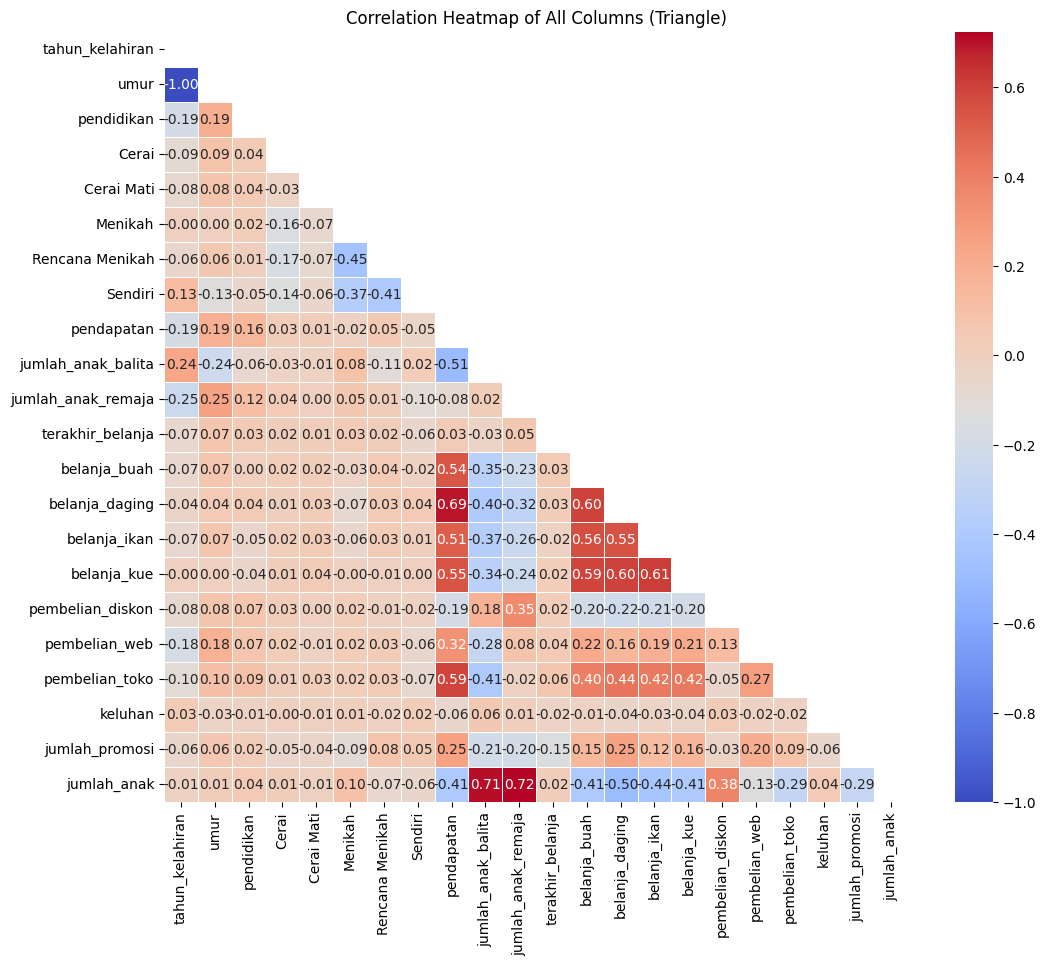

In [325]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = train_woDate.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with the upper triangle masked
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of All Columns (Triangle)')
plt.show()


In [328]:
med('pembelian_diskon')
med('pembelian_web')
med('pembelian_toko')

In [329]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3817 non-null   float64
 11  terakhir_belanja         3817 non-null   float64
 12  belanja_buah             3817 non-null   float64
 13  belanja_daging           3817 non-null   float64
 14  belanja_ikan            

## **Keluhan**

In [330]:
train['keluhan'].unique()

array([ 0., nan,  1.])

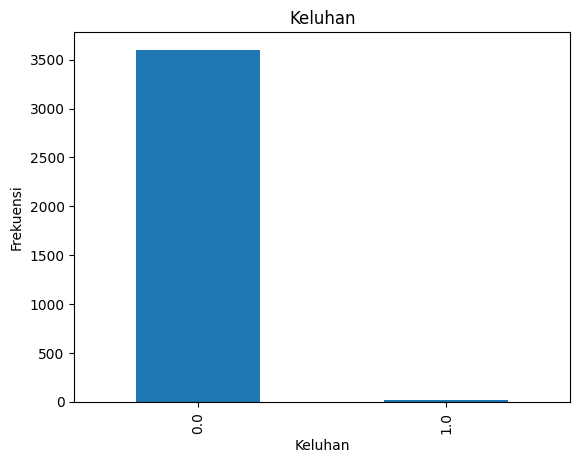

In [331]:
train['keluhan'].value_counts().plot(kind='bar')
plt.xlabel('Keluhan')
plt.ylabel('Frekuensi')
plt.title('Keluhan')
plt.show()


In [332]:
train['keluhan'] = train['keluhan'].fillna(0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   umur                     3817 non-null   int64  
 2   pendidikan               3817 non-null   int32  
 3   Cerai                    3817 non-null   int32  
 4   Cerai Mati               3817 non-null   int32  
 5   Menikah                  3817 non-null   int32  
 6   Rencana Menikah          3817 non-null   int32  
 7   Sendiri                  3817 non-null   int32  
 8   pendapatan               3817 non-null   int32  
 9   jumlah_anak_balita       3817 non-null   int32  
 10  jumlah_anak_remaja       3817 non-null   float64
 11  terakhir_belanja         3817 non-null   float64
 12  belanja_buah             3817 non-null   float64
 13  belanja_daging           3817 non-null   float64
 14  belanja_ikan            

## **Keanggotaan**

In [333]:
train['tanggal_menjadi_anggota'] = pd.to_datetime(train['tanggal_menjadi_anggota'])
current_date = pd.to_datetime('2024-04-17')
train['member_duration'] = (current_date - train['tanggal_menjadi_anggota']).dt.days
train=train.drop(['tanggal_menjadi_anggota'],axis=1)
train['member_duration']=train['member_duration'].fillna(0)
train

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak_balita,...,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi,jumlah_anak,member_duration
0,1979,45,3,0,0,0,1,0,115621394,0,...,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2,1.0,3635.0
1,1950,74,3,0,0,0,1,0,84063000,0,...,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,0,0.0,4049.0
2,1966,58,3,0,0,1,0,0,127532564,0,...,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,1,0.0,0.0
3,1961,63,4,0,0,0,1,0,165579620,0,...,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,4,0.0,0.0
4,1970,54,3,0,0,0,1,0,117703159,1,...,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,4,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,69,4,0,0,1,0,0,78199470,0,...,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,5,0.0,0.0
3813,1947,77,5,0,0,0,1,0,109306000,0,...,50575.0,27739.0,0.0,3.0,6.0,3.0,0.0,1,1.0,3600.0
3814,1974,50,4,0,0,1,0,0,104621000,0,...,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,0,2.0,3814.0
3815,1957,67,2,0,0,0,1,0,110850000,1,...,70805.0,24276.0,21916.5,4.0,5.0,4.0,0.0,0,2.0,3944.0


In [334]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tahun_kelahiran     3817 non-null   int64  
 1   umur                3817 non-null   int64  
 2   pendidikan          3817 non-null   int32  
 3   Cerai               3817 non-null   int32  
 4   Cerai Mati          3817 non-null   int32  
 5   Menikah             3817 non-null   int32  
 6   Rencana Menikah     3817 non-null   int32  
 7   Sendiri             3817 non-null   int32  
 8   pendapatan          3817 non-null   int32  
 9   jumlah_anak_balita  3817 non-null   int32  
 10  jumlah_anak_remaja  3817 non-null   float64
 11  terakhir_belanja    3817 non-null   float64
 12  belanja_buah        3817 non-null   float64
 13  belanja_daging      3817 non-null   float64
 14  belanja_ikan        3817 non-null   float64
 15  belanja_kue         3817 non-null   float64
 16  pembel

In [336]:
train['total_belanja'] = train['belanja_buah'] + train['belanja_daging'] + train['belanja_ikan'] + train['belanja_kue']

In [337]:
train=train[['tahun_kelahiran','umur', 'pendidikan','Cerai','Cerai Mati','Menikah','Rencana Menikah','Sendiri','pendapatan','jumlah_anak','jumlah_anak_balita','jumlah_anak_remaja','terakhir_belanja','belanja_buah','belanja_daging','belanja_ikan','belanja_kue','total_belanja','pembelian_diskon','pembelian_web','pembelian_toko','keluhan','member_duration','jumlah_promosi']]
train

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak,...,belanja_daging,belanja_ikan,belanja_kue,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,member_duration,jumlah_promosi
0,1979,45,3,0,0,0,1,0,115621394,1.0,...,260967.0,50575.0,20230.0,382347.0,2.0,2.0,5.0,0.0,3635.0,2
1,1950,74,3,0,0,0,1,0,84063000,0.0,...,44506.0,80920.0,20230.0,151725.0,9.0,6.0,4.0,0.0,4049.0,0
2,1966,58,3,0,0,1,0,0,127532564,0.0,...,265460.0,96341.0,145573.0,624985.0,1.0,1.0,7.0,0.0,0.0,1
3,1961,63,4,0,0,0,1,0,165579620,0.0,...,1613901.0,27725.0,125868.0,1973840.0,0.0,7.0,8.0,0.0,0.0,4
4,1970,54,3,0,0,0,1,0,117703159,2.0,...,311757.0,40358.0,33875.0,476553.0,7.0,6.0,5.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,69,4,0,0,1,0,0,78199470,0.0,...,25977.0,3856.0,5784.0,41686.0,5.0,1.0,0.0,0.0,0.0,5
3813,1947,77,5,0,0,0,1,0,109306000,1.0,...,50575.0,27739.0,0.0,78314.0,3.0,6.0,3.0,0.0,3600.0,1
3814,1974,50,4,0,0,1,0,0,104621000,2.0,...,62713.0,8092.0,0.0,72828.0,7.0,5.0,7.0,0.0,3814.0,0
3815,1957,67,2,0,0,0,1,0,110850000,2.0,...,70805.0,24276.0,21916.5,135204.5,4.0,5.0,4.0,0.0,3944.0,0


# **Training Data**

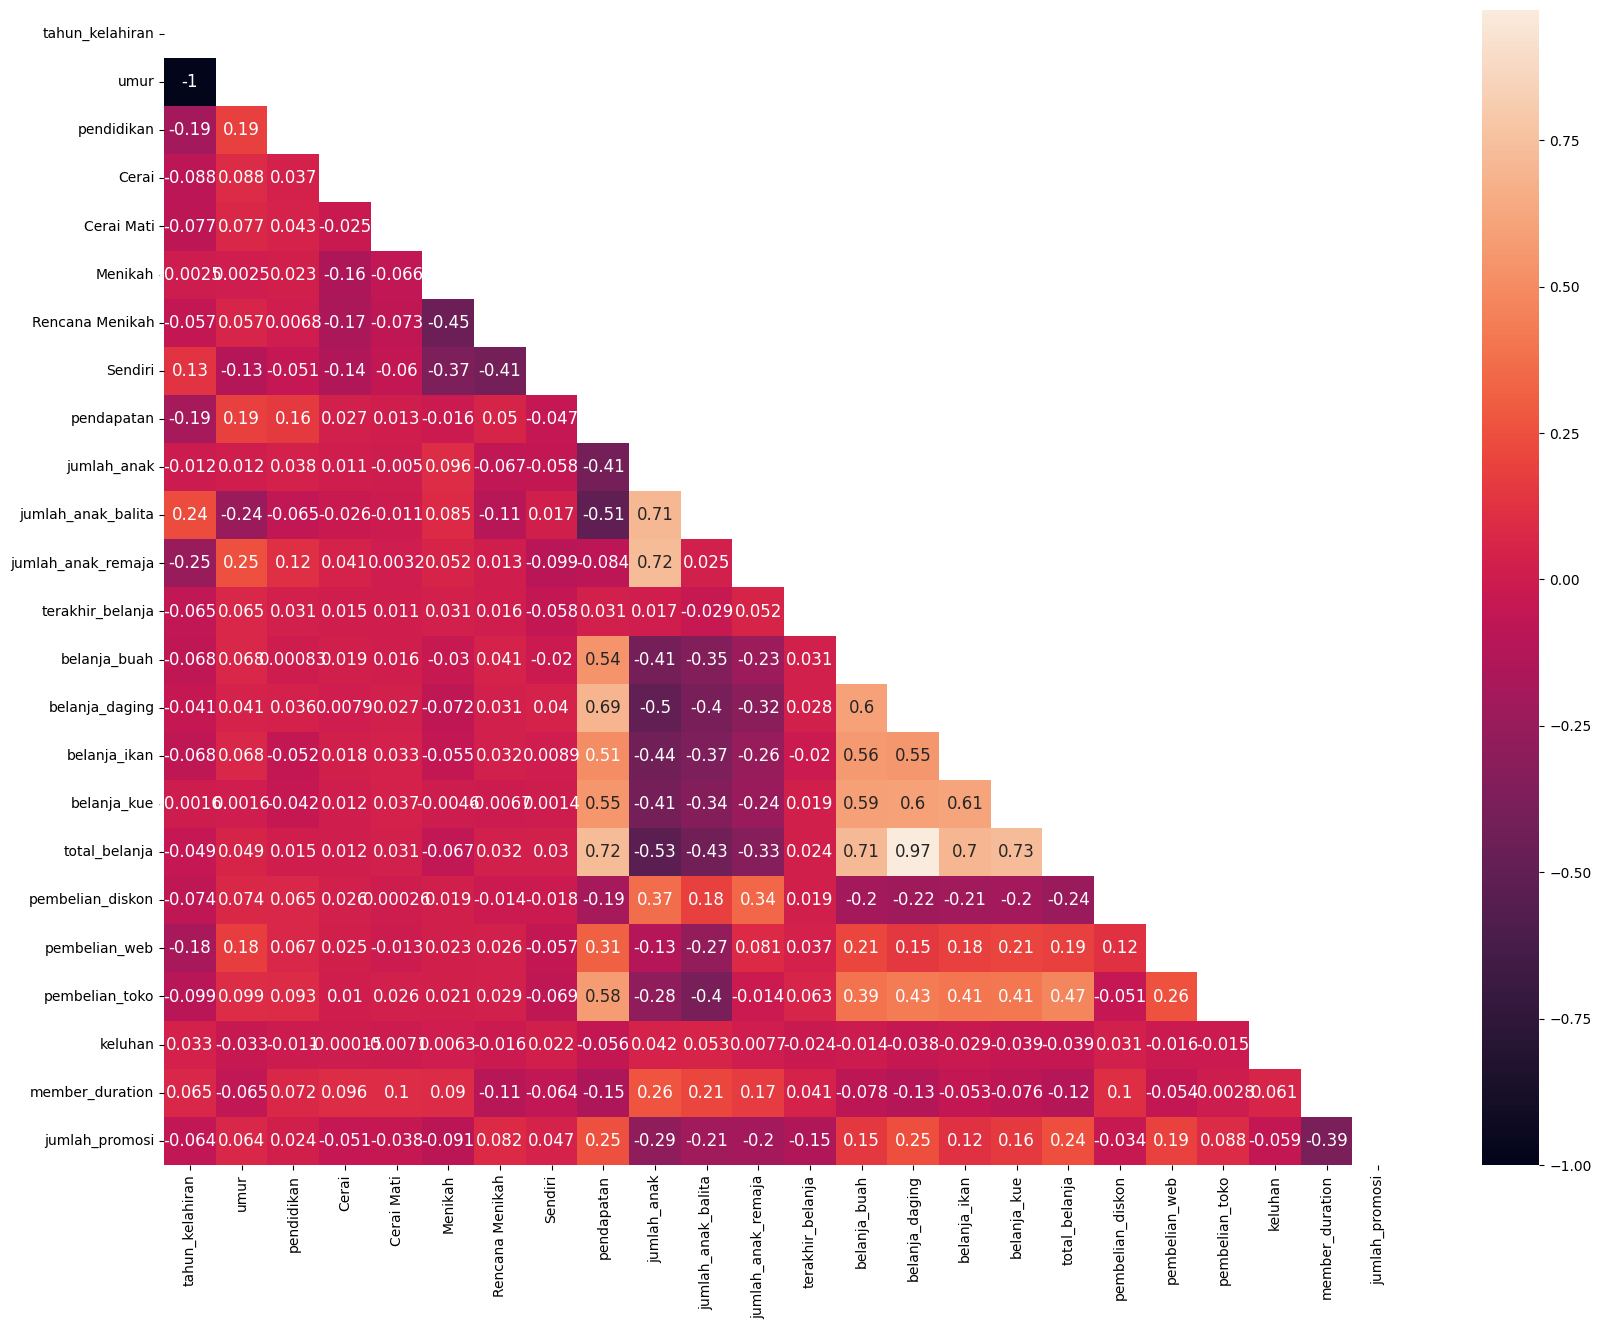

In [338]:
train_corr = train.corr()

plt.figure(figsize=(20,15))
sns.heatmap(train_corr, annot=True,annot_kws={'size':12},mask=np.triu(train_corr))

plt.show()

In [339]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


### Machine Learning

#### XGBoost

In [340]:
# import warnings
# import optuna
# from sklearn.model_selection import KFold
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.model_selection import cross_val_score
# from xgboost import XGBClassifier
# import numpy as np

# warnings.simplefilter(action='ignore', category=FutureWarning)

# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
#         'gamma': trial.suggest_loguniform('gamma', 0.01, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.01, 1.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.01, 1.0),
#         'max_delta_step': trial.suggest_loguniform('max_delta_step', 1e-6, 10),
#         'objective': 'multi:softmax',  # Multiclass classification
#         'num_class': 6  # Number of classes
#     }

#     xgb = XGBClassifier(**params)

#     cv = KFold(n_splits=5, shuffle=True, random_state=42)
#     accuracy_scorer = make_scorer(score_func=accuracy_score)
#     accuracy_scores = cross_val_score(xgb, X, y, cv=cv, scoring=accuracy_scorer)

#     return np.mean(accuracy_scores)

# X = train.drop(columns=['jumlah_promosi'])
# y = train['jumlah_promosi']

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# print('Best trial:')
# best_trial = study.best_trial
# print('  Value: {}'.format(best_trial.value))
# print('  Params: ')
# for key, value in best_trial.params.items():
#     print('    {}: {}'.format(key, value))

# best_params = study.best_params
# best_xgb = XGBClassifier(**best_params)

# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# accuracy_scorer = make_scorer(score_func=accuracy_score)
# accuracy_scores = cross_val_score(best_xgb, X, y, cv=cv, scoring=accuracy_scorer)

# mean_accuracy = np.mean(accuracy_scores)
# print(f'Mean Accuracy: {mean_accuracy}')


c:\Users\XYLA\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-04-21 11:18:12,581] A new study created in memory with name: no-name-af8d298e-2519-4514-b643-546e7a4b85bd
[I 2024-04-21 11:18:33,808] Trial 0 finished with value: 0.25752780770312833 and parameters: {'n_estimators': 489, 'max_depth': 3, 'learning_rate': 0.03007949977232878, 'subsample': 0.657638156725628, 'colsample_bytree': 0.624359814786875, 'min_child_weight': 18, 'gamma': 0.3761171503030944, 'reg_alpha': 0.08972435048648675, 'reg_lambda': 0.03657559685112302, 'max_delta_step': 1.6401492444486849e-06}. Best is trial 0 with value: 0.25752780770312833.
[I 2024-04-21 11:18:48,133] Trial 1 finished with value: 0.25752780770312833 and parameters: {'n_estimators': 891, 'max_depth': 7, 'learning_rate': 0.02155

Best trial:
  Value: 0.7338224698592632
  Params: 
    n_estimators: 645
    max_depth: 8
    learning_rate: 0.03138063848410948
    subsample: 0.9035248979831413
    colsample_bytree: 0.8065702937861967
    min_child_weight: 1
    gamma: 0.024392013423410172
    reg_alpha: 0.0728154467283286
    reg_lambda: 0.06287723450417873
    max_delta_step: 2.0483022652643137
Mean Accuracy: 0.7338224698592632


In [361]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}

X = train.drop(columns=['jumlah_promosi'])
y = train['jumlah_promosi']

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print('Best hyperparameters are:', grid_search.best_params_)
print('Best score is:', grid_search.best_score_)

KeyboardInterrupt: 

#### Random Forest

In [357]:
import warnings
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    rfc = RandomForestClassifier(**params)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scorer = make_scorer(score_func=accuracy_score)
    accuracy_scores = cross_val_score(rfc, X, y, cv=cv, scoring=accuracy_scorer)

    return np.mean(accuracy_scores)

X = train.drop(columns=['jumlah_promosi'])
y = train['jumlah_promosi']

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
best_trial = study.best_trial
print('  Value: {}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

best_params = study.best_params
best_rfc = RandomForestClassifier(**best_params)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scorer = make_scorer(score_func=accuracy_score)
accuracy_scores = cross_val_score(best_rfc, X, y, cv=cv, scoring=accuracy_scorer)

mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy}')

[I 2024-04-21 12:22:50,780] A new study created in memory with name: no-name-e7dbdaea-e47b-4f37-a1b7-a656ca3f65ef
[I 2024-04-21 12:23:43,722] Trial 0 finished with value: 0.6607220053110826 and parameters: {'n_estimators': 567, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.6607220053110826.
[I 2024-04-21 12:24:19,201] Trial 1 finished with value: 0.6078050270014341 and parameters: {'n_estimators': 380, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.6607220053110826.
[I 2024-04-21 12:26:26,331] Trial 2 finished with value: 0.6782749960544283 and parameters: {'n_estimators': 980, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 2 with value: 0.6782749960544283.
[I 2024-04-21 12:27:19,071] Trial 3 finished with value: 0.6300734905615064 and parameters: {'n_estimators': 440, 'max_depth': 12, 'min_samples_spl

Best trial:
  Value: 0.7034281871641975
  Params: 
    n_estimators: 267
    max_depth: 15
    min_samples_split: 3
    min_samples_leaf: 1
    bootstrap: False
Mean Accuracy: 0.7034257855118607


In [360]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {

}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print('Best hyperparameters are:', grid_search.best_params_)
print('Best score is:', grid_search.best_score_)

Best hyperparameters are: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score is: 0.700290339102238


In [341]:
test

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,2014-03-17
3814,3334,1972,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,NaN
3815,3478,1968,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,NaN,0.0,1.0,0.0,NaN
3816,89,1966,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,NaN,0.0,3.0,5.0,3.0,0.0,2014-01-20


In [342]:
test['umur']=2024-test['tahun_kelahiran']
test['pendidikan'] = test['pendidikan'].replace('5', np.nan)
test['pendidikan'] = test['pendidikan'].replace('SMP', 1)
test['pendidikan'] = test['pendidikan'].replace('SMA', 2)
test['pendidikan'] = test['pendidikan'].replace('Sarjana', 3)
test['pendidikan'] = test['pendidikan'].replace('Magister', 4)
test['pendidikan'] = test['pendidikan'].replace('Doktor', 5)
test['pendidikan'] = test['pendidikan'].fillna(0)
test['pendidikan'] = test['pendidikan'].astype(int)
test['status_pernikahan'] = test['status_pernikahan'].replace('5', np.nan)
encoded_df = pd.get_dummies(test['status_pernikahan'])
encoded_df = encoded_df.astype(int)
test=pd.concat([test, encoded_df], axis=1)
test=test.drop(['status_pernikahan'],axis=1)

median_value = test['pendapatan'].median()
test['pendapatan'] = test['pendapatan'].fillna(median_value)
test['pendapatan'] = test['pendapatan'].astype(int)

test.loc[(test['Cerai'] == 1) | (test['Cerai Mati'] == 1) | (test['Rencana Menikah'] == 1) | (test['Sendiri'] == 1), 'jumlah_anak_balita'] = test['jumlah_anak_balita'].fillna(0)
test['jumlah_anak_balita'] = test['jumlah_anak_balita'].fillna(1)
test['jumlah_anak_balita'] = test['jumlah_anak_balita'].astype(int)

test.loc[(test['Rencana Menikah'] == 1) | (test['Sendiri'] == 1), 'jumlah_anak_remaja'] = test['jumlah_anak_remaja'].fillna(0)
test['jumlah_anak_remaja'] = test['jumlah_anak_remaja'].fillna(0)

test['jumlah_anak']=test['jumlah_anak_balita']+test['jumlah_anak_remaja']

median_value = test['terakhir_belanja'].median()
test['terakhir_belanja'] = test['terakhir_belanja'].fillna(median_value)

def tesbelanja(barang):
  median_value = test[barang].median()
  test[barang] = test[barang].fillna(median_value)
tesbelanja('belanja_buah')
tesbelanja('belanja_daging')
tesbelanja('belanja_ikan')
tesbelanja('belanja_kue')

test['total_belanja']=test['belanja_buah']+test['belanja_daging']+test['belanja_ikan']+test['belanja_kue']

tesbelanja('pembelian_diskon')
tesbelanja('pembelian_web')
tesbelanja('pembelian_toko')

test['keluhan'] = test['keluhan'].fillna(0)

test['tanggal_menjadi_anggota'] = pd.to_datetime(test['tanggal_menjadi_anggota'])
current_date = pd.to_datetime('2024-04-17')
test['member_duration'] = (current_date - test['tanggal_menjadi_anggota']).dt.days
test=test.drop(['tanggal_menjadi_anggota'],axis=1)
test['member_duration']=test['member_duration'].fillna(0)


In [345]:
test=test[['tahun_kelahiran','umur', 'pendidikan','Cerai','Cerai Mati','Menikah','Rencana Menikah','Sendiri','pendapatan','jumlah_anak','jumlah_anak_balita','jumlah_anak_remaja','terakhir_belanja','belanja_buah','belanja_daging','belanja_ikan','belanja_kue','total_belanja','pembelian_diskon','pembelian_web','pembelian_toko','keluhan','member_duration']]

In [346]:
test

,tahun_kelahiran,umur,pendidikan,Cerai,Cerai Mati,Menikah,Rencana Menikah,Sendiri,pendapatan,jumlah_anak,...,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,member_duration
0,1957,67,3,0,0,0,0,0,120660151,1.0,...,122277.0,541399.0,214192.0,84305.0,962173.0,4.0,6.0,10.0,0.0,0.0
1,1968,56,5,0,0,1,0,0,163551821,1.0,...,35761.0,353335.0,63365.0,41112.0,493573.0,2.0,5.0,10.0,0.0,0.0
2,1968,56,2,0,0,1,0,0,29857000,0.0,...,8092.0,22253.0,30345.0,26299.0,86989.0,2.0,0.0,5.0,0.0,3907.0
3,1971,53,5,0,0,1,0,0,117949098,1.0,...,4872.0,126061.0,0.0,9745.0,140678.0,3.0,5.0,7.0,0.0,0.0
4,1974,50,3,0,0,0,1,0,164761134,0.0,...,343208.0,1416462.0,236196.0,107776.0,2103642.0,0.0,1.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1984,40,4,0,0,0,0,1,66320000,1.0,...,12138.0,38437.0,0.0,10115.0,60690.0,4.0,0.0,6.0,1.0,3684.0
3814,1972,52,3,0,0,1,0,0,159651946,0.0,...,32119.0,1032587.0,176078.0,78693.0,1319477.0,0.0,6.0,8.0,0.0,0.0
3815,1968,56,4,0,0,0,1,0,84058923,1.0,...,8198.0,47595.0,11392.0,10540.0,77725.0,2.0,0.0,1.0,0.0,0.0
3816,1966,58,3,0,0,0,1,0,106301000,1.0,...,16184.0,78897.0,40025.5,0.0,135106.5,3.0,5.0,3.0,0.0,3740.0


In [347]:
best_xgb.fit(X, y)
y_pred = best_xgb.predict(test)

In [348]:
y_pred

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [349]:
sub

,ID,jumlah_promosi
0,2241,6
1,2274,6
2,1107,6
3,4478,6
4,5080,6
...,...,...
3813,271,6
3814,3334,6
3815,3478,6
3816,89,6


In [350]:
df = pd.DataFrame(y_pred, columns=['jumlah_promosi'])

In [351]:
df

,jumlah_promosi
0,0
1,0
2,0
3,3
4,4
...,...
3813,0
3814,1
3815,3
3816,0


In [352]:
df['jumlah_promosi']=df['jumlah_promosi'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   jumlah_promosi  3818 non-null   int32
dtypes: int32(1)
memory usage: 15.0 KB


In [354]:
test = pd.read_csv('dataset/test_features.csv')

In [355]:
col_id=test['ID']
df=pd.concat([col_id, df], axis=1)
df

,ID,jumlah_promosi
0,2241,0
1,2274,0
2,1107,0
3,4478,3
4,5080,4
...,...,...
3813,271,0
3814,3334,1
3815,3478,3
3816,89,0


In [356]:
df.to_csv('xyla_xgb_73382.csv', index=False)